# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

## Load the dataset and show the basic information

In [2]:
data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [4]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with following rules (5 marks)
1. If over 50% of the values of a column are missing, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [5]:
# Remove columns with more than 50% missing values
half_count = len(data)/2;
data = data.dropna(thresh=half_count, axis=1)

# For categorical columns, if a row contains a missing value, delete the whole row
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.dropna(subset=categorical_columns)

# For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data = data[numerical_columns].fillna(data[numerical_columns].mean())

### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical information and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [6]:
# Remove columns that don't provide statistical information (all the categorical values are unique)
for column in data.columns:
    if data[column].nunique() == len(data):
        data = data.drop(column, axis=1)
        
# Convert the categorical values into numerical ones
data = pd.get_dummies(data)

## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attribute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [7]:
# Specify features
features = data.drop('LoanApproved', axis=1)

# Specify label
label = data['LoanApproved']

# Split the data (80% training and 20% testing) setting random state as my ID: 48724432
student_id = 48724432
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=student_id)


### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [8]:
# Train a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predictions on training and testing data
y_prediction_train = model.predict(X_train)
y_prediction_test = model.predict(X_test)

# Report two classsification metrics (accuracy and f1-score) on training data
train_accuracy = accuracy_score(y_train, y_prediction_train)
train_f1 = f1_score(y_train, y_prediction_train)
print(f'Training accuracy: {train_accuracy:.2f} \nTraining f1-score: {train_f1:.2f}')

# Report two classsification metrics (accuracy and f1-score) on testing data
test_accuracy = accuracy_score(y_test, y_prediction_test)
test_f1 = f1_score(y_test, y_prediction_test)
print(f'Testing accuracy: {test_accuracy:.2f} \nTesting f1-score: {test_f1:.2f}')


# Compare testing and training metrics to justify if model is overfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy)>0.1:
    print("The model seems to be overfitting, the training performance is significantly better than the testing performance")
else:
    print("The model does not seem to be overfitting, the training performance is not significantly higher than the testing performance")

Training accuracy: 0.90 
Training f1-score: 0.78
Testing accuracy: 0.90 
Testing f1-score: 0.79
The model does not seem to be overfitting, the training performance is not significantly higher than the testing performance


**Results** 

These results show the performance of the logistic regression model on the training and testing data.

An accuracy of 0.90 on both sets means that the model correctly predicted 90% of the testing and training data.

Similar f1-scores (0.78 and 0.79) show that the model mantains similar performance on new data. This values indicate that the model performs reasonably well but that it still has room for improvement in balancing precision and recall. Some false positives and false negatives take place.

The model is does not seem to be overfitting because it achieves similar results in the testing and training data.

### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.

In [9]:
# Track performance metrics for different numbers of features
accuracies = []
f1_scores = []
num_features = list(range(1, len(features.columns) + 1))

for i in num_features:
    # Adjust number of features (eliminates less relevant, only i mosto important will be selected
    rfe = RFE(estimator=model, n_features_to_select=i)
    # Trains RFE
    rfe.fit(features, label)
    # Transforms training and testing data to inlcude only i features
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)
    # Trains the model with selected features
    model.fit(X_train_rfe, y_train)
    # Predicts on the test set
    y_test_prediction_rfe = model.predict(X_test_rfe)
    # Calculate and update accuracies an f1_score adding the value of the metrics for i number of features
    accuracies.append(accuracy_score(y_test, y_test_prediction_rfe))
    f1_scores.append(f1_score(y_test, y_test_prediction_rfe))

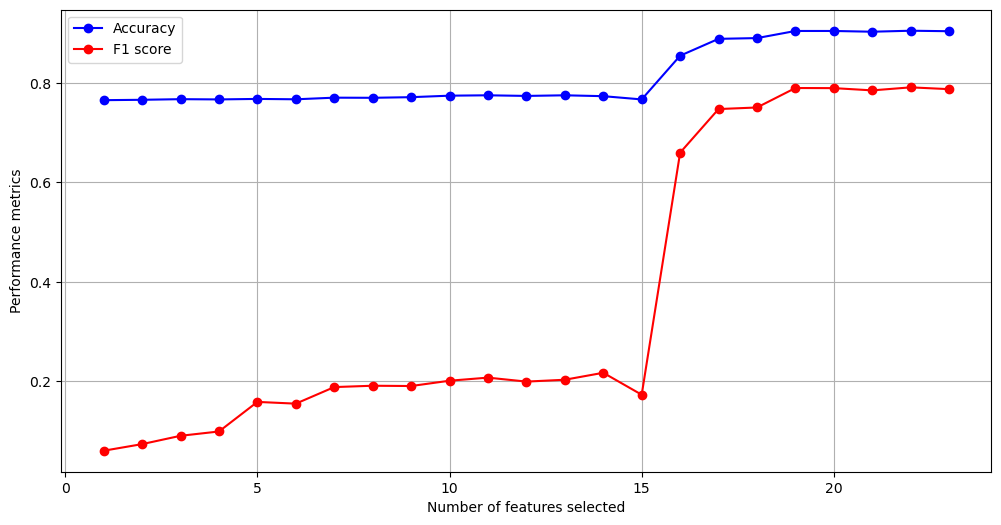

In [10]:
# Plot accuracy and f-1 score to visualise the metrics with respect to the number of eliminated features
plt.figure(figsize=(12, 6))
plt.plot(num_features, accuracies, label='Accuracy', marker='o', color='blue')
plt.plot(num_features, f1_scores, label='F1 score', marker='o', color='red')
plt.xlabel('Number of features selected')
plt.ylabel('Performance metrics')
plt.legend()
plt.grid(True)
plt.show()

**Results**

Typically, the most important features are selected first by RFE, leading to better performace early on instead of showing a significant improvement only after selecting 16 (out of 23) features. 
This could be due to:
- Interactions between features that may not be impactful individually but become more valuable when combined with others
- The RFE selecting features by how they contribute together on the model instead of how they each impact
- Early selected features being correlated and therefore providing similar information

2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [11]:
# Select optimal value considering performance maxiisation and feature minimisation
optimal_number_features = 16
print(f'The optimal number of features selected: {optimal_number_features}')
      
# Run RFE with chosen number of eliminated features
rfe = RFE(estimator=model, n_features_to_select=optimal_number_features)
rfe.fit(features, label)

# Obtain and print corresponding set of retained features
selected_features = features.columns[rfe.support_]
print(f'The selected features are: {list(selected_features)}')

The optimal number of features selected: 16
The selected features are: ['Age', 'CreditScore', 'Experience', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'MonthlyIncome', 'JobTenure', 'BaseInterestRate', 'InterestRate']


## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Select the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [12]:
# Select the features identified in Step 2.3
X_train_optimal = X_train[selected_features]
X_test_optimal = X_test[selected_features]

# Build 1-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_optimal, y_train)

# Predictions on training and testing data 
y_prediction_train_knn = knn_model.predict(X_train_optimal)
y_prediction_test_knn = knn_model.predict(X_test_optimal)

# Report two classsification metrics (accuracy and f1-score) on training data
train_accuracy_knn = accuracy_score(y_train, y_prediction_train_knn)
train_f1_knn = f1_score(y_train, y_prediction_train_knn)
print(f'KNN Training accuracy: {train_accuracy_knn:.2f} \nKNN Training f1-score: {train_f1_knn:.2f}')

# Report two classsification metrics (accuracy and f1-score) on testing data
test_accuracy_knn = accuracy_score(y_test, y_prediction_test_knn)
test_f1_knn = f1_score(y_test, y_prediction_test_knn)
print(f'KNN Testing accuracy: {test_accuracy_knn:.2f} \nKNN Testing f1-score: {test_f1_knn:.2f}')

# Compare testing and training metrics to justify if model is overfitting
if train_accuracy_knn > test_accuracy_knn and (train_accuracy_knn - test_accuracy_knn)>0.1:
    print("The model seems to be overfitting, the training performance is significantly better than the testing performance")
else:
    print("The model does not seem to be overfitting, the training performance is not significantly higher than the testing performance")

KNN Training accuracy: 1.00 
KNN Training f1-score: 1.00
KNN Testing accuracy: 0.79 
KNN Testing f1-score: 0.57
The model seems to be overfitting, the training performance is significantly better than the testing performance


**Results** 

These results show the performance of the 1-NN classifier on the training and testing data.

An accuracy of 1.00 on the training set means that the model perfectly predicted all the training data. On the other hand, an accuracy of 0.79 on the testing data indicates that it only predicted correctly 79% of the testing data. 

There is also a significant difference in f1-scores (1.00 and 0.57). This results show that the model does not mantain similar performance on new data. This values indicate that the model needs a lot of improvement in balancing precision and recall on new data. 

The model is overfitting because it achieves perfect results on the training set but fails to generalize well.

### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. Use grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

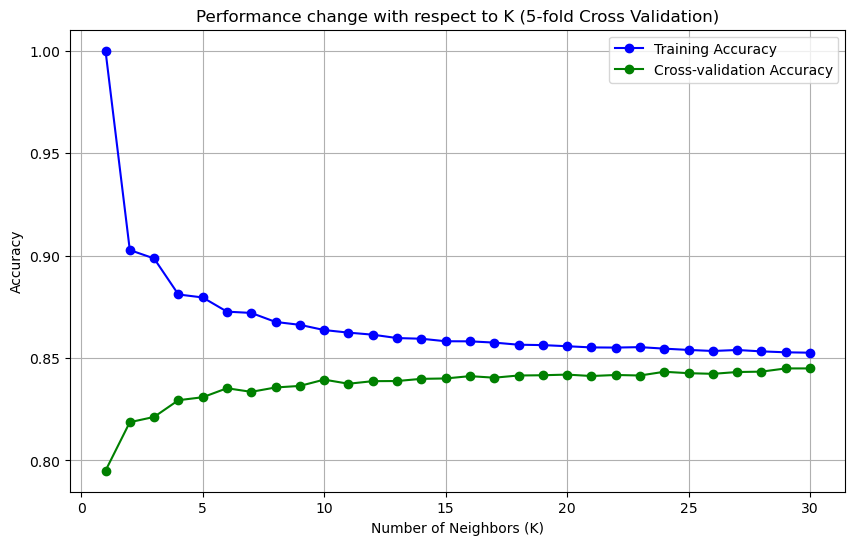

The best K found: 29
Best KNN Training accuracy: 0.85
Best KNN Training f1-score: 0.66
Best KNN Testing accuracy: 0.84
Best KNN Testing f1-score: 0.64


In [13]:
# Define range of k (1, 30)
parameter_grid = {'n_neighbors': np.arange(1,31)}

# Use grid search with 5-fold cross validation to search for k in range
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameter_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_optimal, y_train)

# Get the results from the grid search
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']  # Mean accuracy on validation folds
mean_train_scores = cv_results['mean_train_score']  # Mean accuracy on training folds

# Visualize the performance change with respect to K using a line chart
plt.figure(figsize=(10, 6))
plt.plot(parameter_grid['n_neighbors'], mean_train_scores, label='Training Accuracy', marker='o', color='blue')
plt.plot(parameter_grid['n_neighbors'], mean_test_scores, label='Cross-validation Accuracy', marker='o', color='green')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Performance change with respect to K (5-fold Cross Validation)')
plt.legend()
plt.grid(True)
plt.show()

# Get the best K value found by GridSearchCV
best_k = grid_search.best_params_['n_neighbors']
print(f'The best K found: {best_k}')

# Train the KNN model with the best K value
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train_optimal, y_train)

# Report performance metrics for the best K (on training data)
y_pred_train_best_knn = best_knn_model.predict(X_train_optimal)
y_pred_test_best_knn = best_knn_model.predict(X_test_optimal)

# Calculate accuracy and f1-score for the training set
best_train_accuracy = accuracy_score(y_train, y_pred_train_best_knn)
best_train_f1 = f1_score(y_train, y_pred_train_best_knn)
print(f'Best KNN Training accuracy: {best_train_accuracy:.2f}')
print(f'Best KNN Training f1-score: {best_train_f1:.2f}')

# Calculate accuracy and f1-score for the test set
best_test_accuracy = accuracy_score(y_test, y_pred_test_best_knn)
best_test_f1 = f1_score(y_test, y_pred_test_best_knn)
print(f'Best KNN Testing accuracy: {best_test_accuracy:.2f}')
print(f'Best KNN Testing f1-score: {best_test_f1:.2f}')

### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

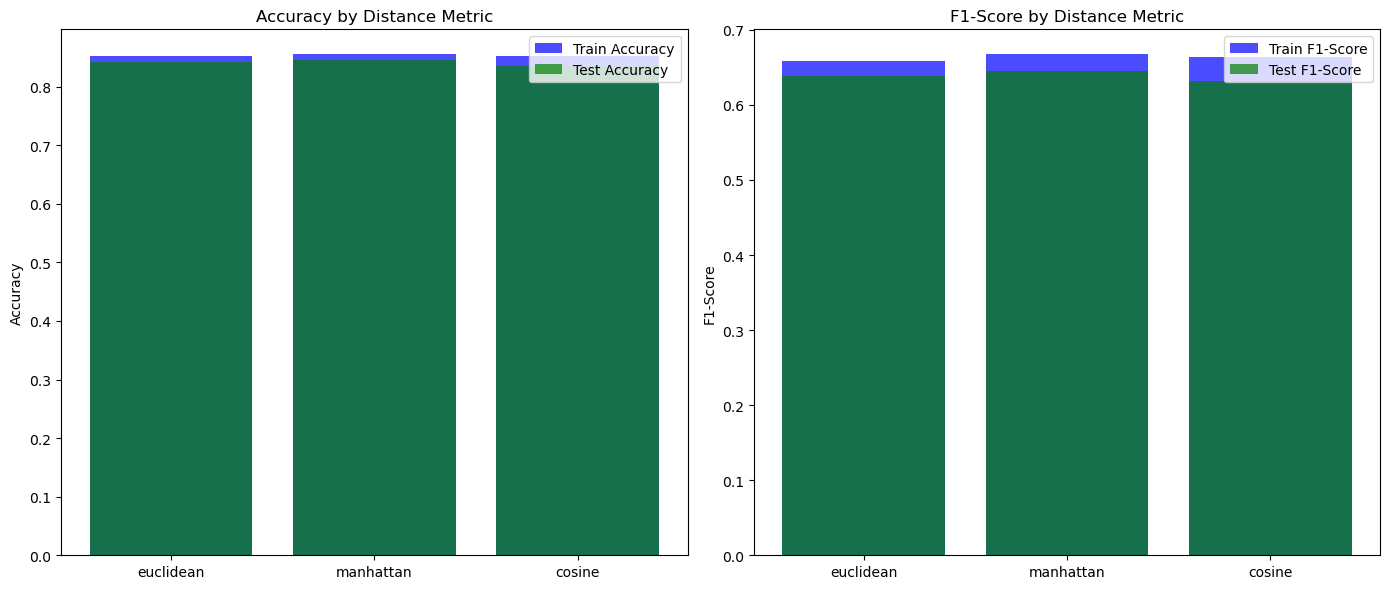

The best distance metric based on test accuracy is: manhattan
The worst distance metric based on test accuracy is: cosine


In [15]:
# Dictionary to store performance metrics for different distance metrics
performance_metrics = {
    'metric': [],
    'train_accuracy': [],
    'test_accuracy': [],
    'train_f1': [],
    'test_f1': []
}

# List of distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Loop over the distance metrics and train KNN models with each
for metric in distance_metrics:
    knn_model = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn_model.fit(X_train_optimal, y_train)

    # Predictions for training and testing data
    y_pred_train = knn_model.predict(X_train_optimal)
    y_pred_test = knn_model.predict(X_test_optimal)

    # Calculate accuracy and f1-score for both train and test sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)

    # Store the results
    performance_metrics['metric'].append(metric)
    performance_metrics['train_accuracy'].append(train_accuracy)
    performance_metrics['test_accuracy'].append(test_accuracy)
    performance_metrics['train_f1'].append(train_f1)
    performance_metrics['test_f1'].append(test_f1)

# Convert the results to a DataFrame for easier handling
import pandas as pd
performance_df = pd.DataFrame(performance_metrics)

# Plot the performance (accuracy and f1-score) for each distance metric
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy
ax[0].bar(performance_df['metric'], performance_df['train_accuracy'], label='Train Accuracy', alpha=0.7, color='blue')
ax[0].bar(performance_df['metric'], performance_df['test_accuracy'], label='Test Accuracy', alpha=0.7, color='green')
ax[0].set_title('Accuracy by Distance Metric')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot f1-score
ax[1].bar(performance_df['metric'], performance_df['train_f1'], label='Train F1-Score', alpha=0.7, color='blue')
ax[1].bar(performance_df['metric'], performance_df['test_f1'], label='Test F1-Score', alpha=0.7, color='green')
ax[1].set_title('F1-Score by Distance Metric')
ax[1].set_ylabel('F1-Score')
ax[1].legend()

plt.tight_layout()
plt.show()

# Find the best and worst metrics based on test accuracy
best_metric = performance_df.loc[performance_df['test_accuracy'].idxmax(), 'metric']
worst_metric = performance_df.loc[performance_df['test_accuracy'].idxmin(), 'metric']

print(f"The best distance metric based on test accuracy is: {best_metric}")
print(f"The worst distance metric based on test accuracy is: {worst_metric}")